# Papers Clustering

Clustering papers to make analysis easier.

In [117]:
import pandas as pd

merged_papers_path = "../recommender_systems/scraper_merged_results/scraped_merged_results.xlsx"
papers_df = pd.read_excel(merged_papers_path)

papers_df.head()

Index  Article Type                                              Title  \
0      1             1  Reinforcement Learning based Recommender Syste...   
1      2             1  Management of Immune-Related Adverse Events in...   
2      3             1  Resolving data sparsity and cold start problem...   
3      4             1  Bias and Debias in Recommender System: A Surve...   
4      5             1  High-performance medicine: the convergence of ...   

                                             Authors  \
0                         B. Far, M. Afsar, T. Crump   
1  A. Naing, A. Spira, B. Santomasso, B. Schneide...   
2  A. Gandomi, S. Natarajan, Sivaramakrishnan R. ...   
3  Fuli Feng, Hande Dong, Jiawei Chen, Meng Wang,...   
4                                           E. Topol   

                        Publication Source  Publication Year  Citations  \
0                    ACM Computing Surveys              2021        102   
1             Journal of Clinical Oncology              2021        251   
2         Expert systems with applications              2020        102   
3  ACM Transactions on Information Systems              2020        246   
4                    Nature Network Boston              2019       2260   

   Importance Rate Impact Factor  \
0         2.999011                 
1         2.999011                 
2         2.998517                 
3         2.998517                 
4         2.998023                 

                                        Article Link  \
0  https://www.semanticscholar.org/paper/5685abf9...   
1  https://www.semanticscholar.org/paper/b20e7551...   
2  https://www.semanticscholar.org/paper/9bb61225...   
3  https://www.semanticscholar.org/paper/9779f919...   
4  https://www.semanticscholar.org/paper/2231aff2...   

                                              BibTex  \
0  @['JournalArticle', 'Review']{Afsar2021Reinfor...   
1  @['JournalArticle', 'Review']{Schneider2021Man...   
2  @['JournalArticle']{Natarajan2020ResolvingDS,\...   
3  @['JournalArticle', 'Review']{Chen2020BiasAD,\...   
4  @['Review', 'JournalArticle']{Topol2019High-pe...   

                                            Synopsis  
0  Recommender systems (RSs) have become an insep...  
1  PURPOSE To increase awareness, outline strateg...  
2                                        No synopsis  
3  While recent years have witnessed a rapid grow...  
4                                        No synopsis

## Encoding the dataset

We will encode the `Title` feature using _tf-idf_ encoder, so we can use it to clusterize similar articles.

In [118]:
'''
Creating TF-IDF vectorizer
'''
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

additional_stop_words = [
   "chinese", 
   "based", 
   "covid", 
   "covid 19", 
   "using", 
   "19", 
   "17", 
]

total_stop_words = text.ENGLISH_STOP_WORDS.union(additional_stop_words)
total_stop_words = list(total_stop_words)

tfidf_vectorizer = TfidfVectorizer(
    analyzer="word",
    stop_words=total_stop_words,
    ngram_range=(1, 2),
)

In [130]:
'''
Encoding using TF-IDF
'''
X = tfidf_vectorizer.fit_transform(papers_df["Title"])
f_names = tfidf_vectorizer.get_feature_names_out()

tfidf_data = pd.DataFrame(X.toarray(), columns=f_names)
tfidf_data.head()

18f  18f fdg  201  201 american  2017  2017 observational  2019  \
0  0.0      0.0  0.0           0.0   0.0                 0.0   0.0   
1  0.0      0.0  0.0           0.0   0.0                 0.0   0.0   
2  0.0      0.0  0.0           0.0   0.0                 0.0   0.0   
3  0.0      0.0  0.0           0.0   0.0                 0.0   0.0   
4  0.0      0.0  0.0           0.0   0.0                 0.0   0.0   

   2019 traditional  2022  21st  ...  yoga therapy  youtube  youtube network  \
0               0.0   0.0   0.0  ...           0.0      0.0              0.0   
1               0.0   0.0   0.0  ...           0.0      0.0              0.0   
2               0.0   0.0   0.0  ...           0.0      0.0              0.0   
3               0.0   0.0   0.0  ...           0.0      0.0              0.0   
4               0.0   0.0   0.0  ...           0.0      0.0              0.0   

   youtube recommender  yum  yum personalized  zero  zero preventable  zipf  \
0                  0.0  0.0               0.0   0.0               0.0   0.0   
1                  0.0  0.0               0.0   0.0               0.0   0.0   
2                  0.0  0.0               0.0   0.0               0.0   0.0   
3                  0.0  0.0               0.0   0.0               0.0   0.0   
4                  0.0  0.0               0.0   0.0               0.0   0.0   

   zipf law  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  

[5 rows x 4973 columns]

## Aplying K-means

Now with the `Title` feature encoded we apply _K-means_ to discover the most "famous" recurrent topics.

### Fine tune with elbow method

First we fine tune with the elbow method.

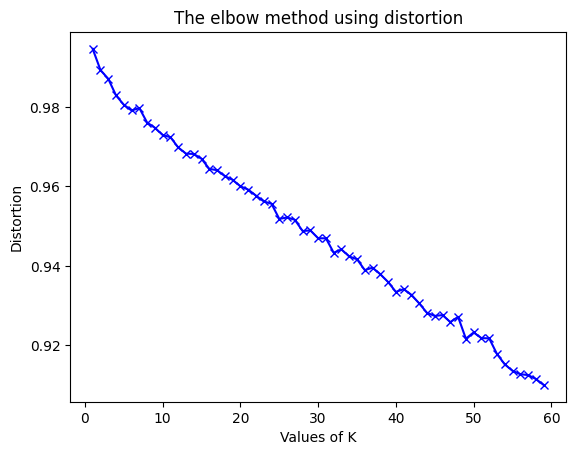

In [144]:
## Elbow method in python
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

## Suppress warnings 
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# The method it self
distortions = []
mapping_distortion = {}
mapping_inertia = {}

K = range(1, 60)

for k in K:
    k_means = KMeans(n_clusters=k)
    k_means.fit_predict(tfidf_data)
  
    euc_distance = cdist(tfidf_data, k_means.cluster_centers_, 'euclidean')
    
    distortion = sum(np.min(euc_distance, axis=1) / X.shape[0])
    distortions.append(distortion)
    mapping_distortion[k] = distortion
    mapping_inertia[k] = k_means.inertia_
   
   
# Ploting the elbow 
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The elbow method using distortion')
plt.show()
    

### Applying K-means with the right number of clusters

In [145]:
# Applying K-means
from sklearn.cluster import KMeans

n_clusters = 55 

kmeans = KMeans(n_clusters=n_clusters)
papers_df["Cluster"] = kmeans.fit_predict(tfidf_data)
papers_df["Cluster"] = papers_df["Cluster"].astype("category")

papers_df.head()

Index  Article Type                                              Title  \
0      1             1  Reinforcement Learning based Recommender Syste...   
1      2             1  Management of Immune-Related Adverse Events in...   
2      3             1  Resolving data sparsity and cold start problem...   
3      4             1  Bias and Debias in Recommender System: A Surve...   
4      5             1  High-performance medicine: the convergence of ...   

                                             Authors  \
0                         B. Far, M. Afsar, T. Crump   
1  A. Naing, A. Spira, B. Santomasso, B. Schneide...   
2  A. Gandomi, S. Natarajan, Sivaramakrishnan R. ...   
3  Fuli Feng, Hande Dong, Jiawei Chen, Meng Wang,...   
4                                           E. Topol   

                        Publication Source  Publication Year  Citations  \
0                    ACM Computing Surveys              2021        102   
1             Journal of Clinical Oncology              2021        251   
2         Expert systems with applications              2020        102   
3  ACM Transactions on Information Systems              2020        246   
4                    Nature Network Boston              2019       2260   

   Importance Rate Impact Factor  \
0         2.999011                 
1         2.999011                 
2         2.998517                 
3         2.998517                 
4         2.998023                 

                                        Article Link  \
0  https://www.semanticscholar.org/paper/5685abf9...   
1  https://www.semanticscholar.org/paper/b20e7551...   
2  https://www.semanticscholar.org/paper/9bb61225...   
3  https://www.semanticscholar.org/paper/9779f919...   
4  https://www.semanticscholar.org/paper/2231aff2...   

                                              BibTex  \
0  @['JournalArticle', 'Review']{Afsar2021Reinfor...   
1  @['JournalArticle', 'Review']{Schneider2021Man...   
2  @['JournalArticle']{Natarajan2020ResolvingDS,\...   
3  @['JournalArticle', 'Review']{Chen2020BiasAD,\...   
4  @['Review', 'JournalArticle']{Topol2019High-pe...   

                                            Synopsis Cluster  
0  Recommender systems (RSs) have become an insep...       6  
1  PURPOSE To increase awareness, outline strateg...      54  
2                                        No synopsis      13  
3  While recent years have witnessed a rapid grow...      15  
4                                        No synopsis      42

## Analysing - Getting the most recurrent words in each cluster and displaying them as word cloud

### Getting the most recurrent words from each cluster

In [146]:
def get_n_most_recurrent_words_from_cluster(
    cluster_number: int,
    n: int,
):
    '''
    gets the n most recurrent words and returns in pandas.Series format
    '''
    clusters_papers = papers_df[papers_df.Cluster == cluster_number]
    clusters_words = tfidf_data[tfidf_data.index.isin(clusters_papers.index)]

    most_recurrent_words = clusters_words.sum()
    most_recurrent_words = most_recurrent_words.sort_values(ascending=False)

    return most_recurrent_words.head(n)

In [147]:
n = 50
'''
cluster words is a vector of pandas.Series that contains the most frequent words in each cluster.
each cluster number is the same as the vector index.
'''
cluster_words = []

for c in range(0, n_clusters -1):
    cluster_words.append(
        get_n_most_recurrent_words_from_cluster(
            cluster_number=c,
            n=n
        )
    )
   

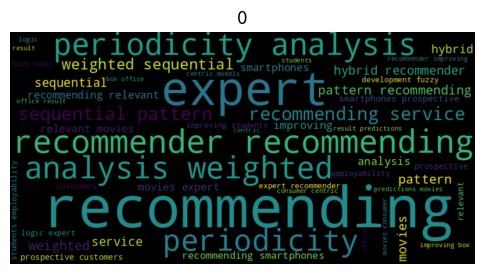

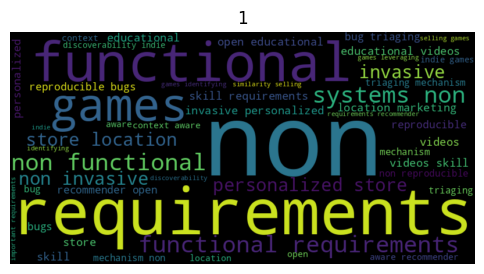

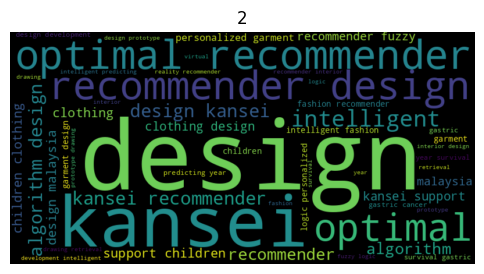

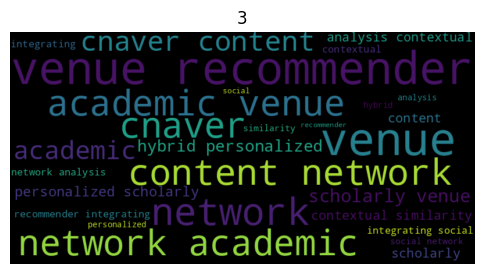

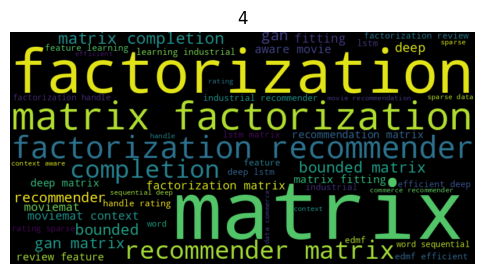

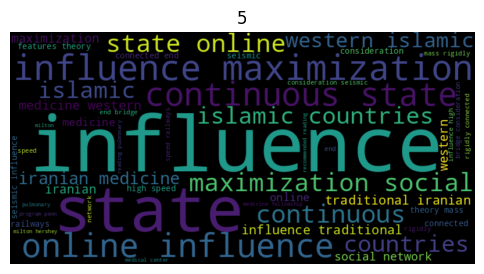

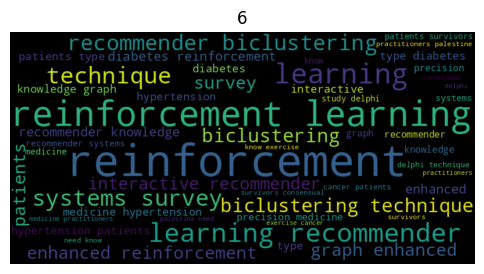

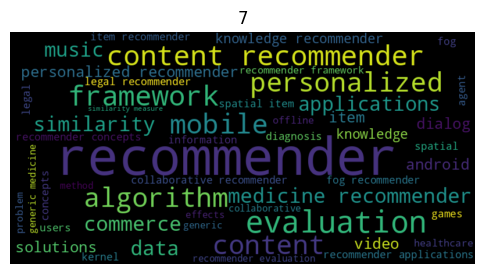

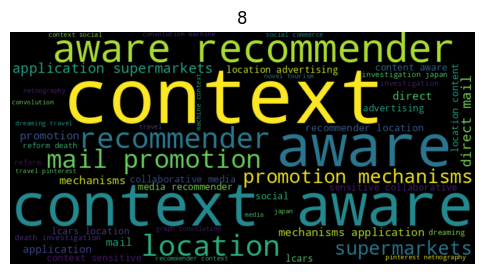

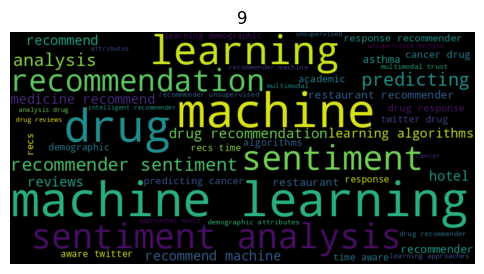

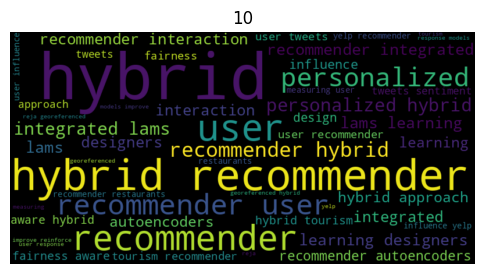

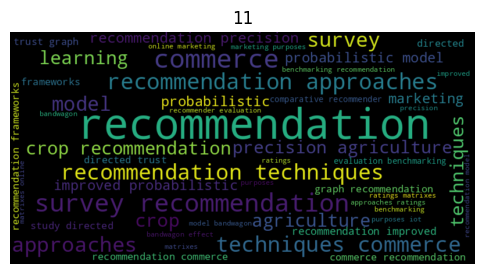

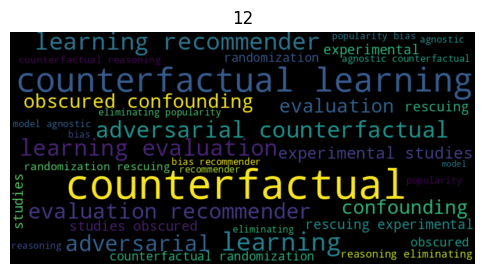

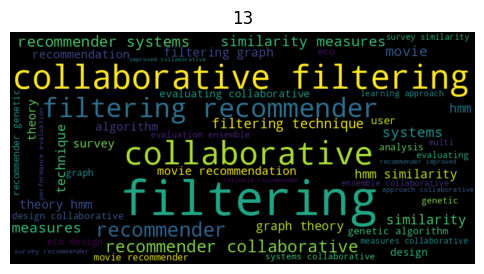

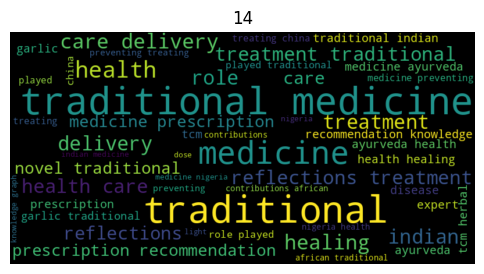

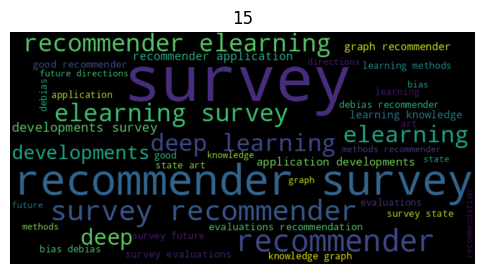

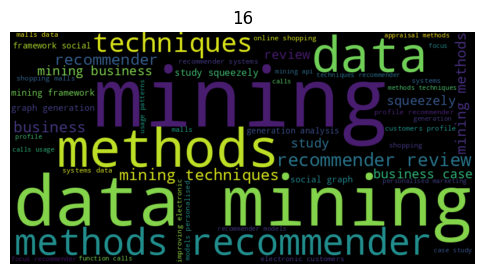

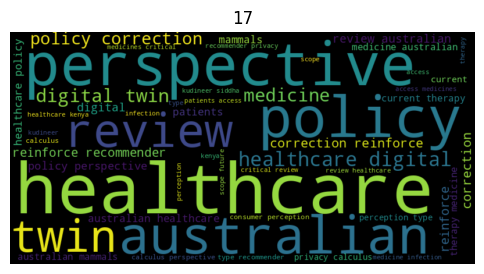

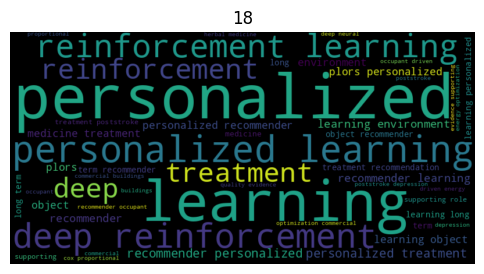

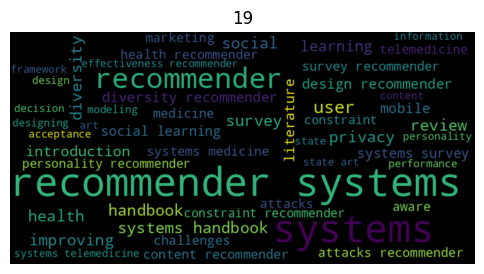

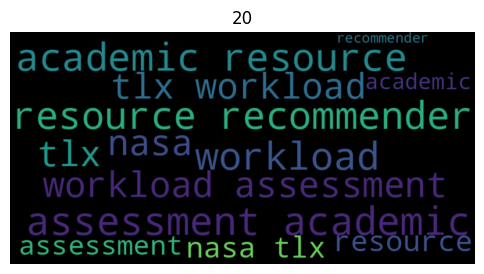

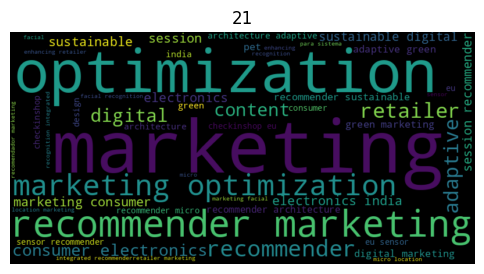

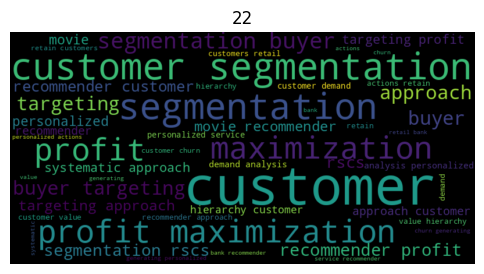

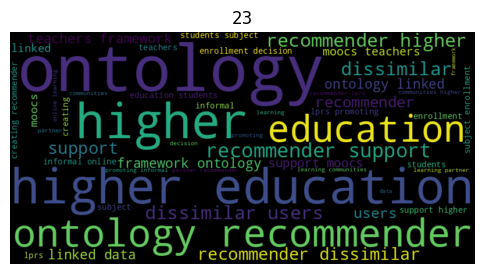

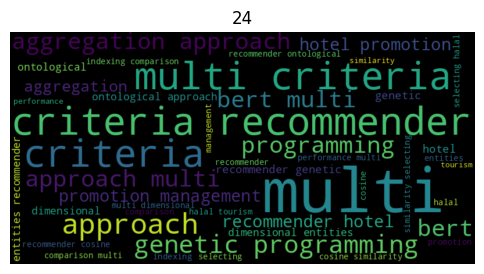

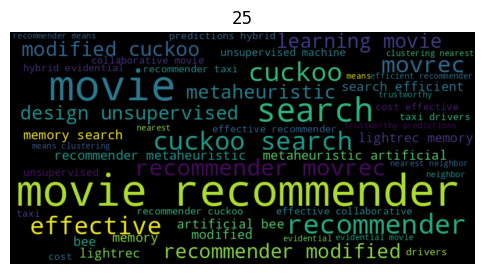

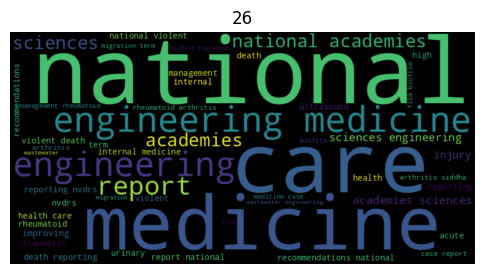

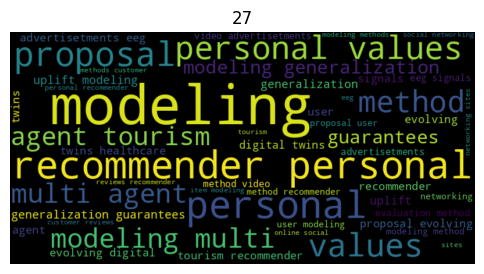

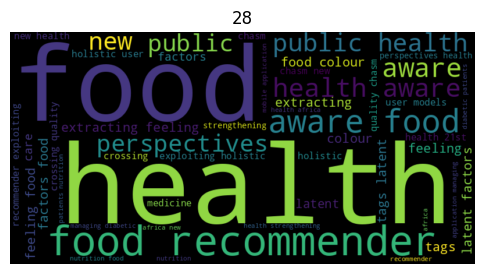

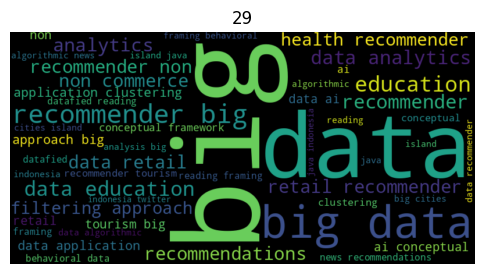

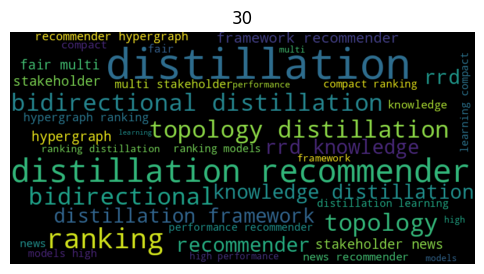

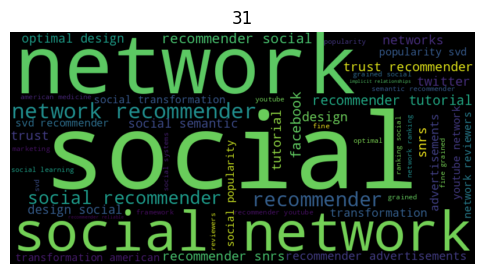

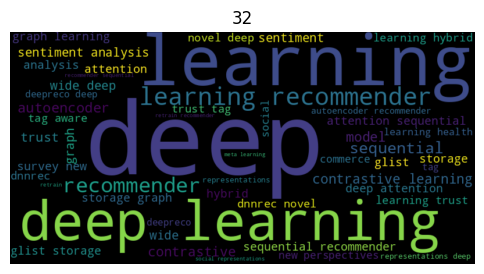

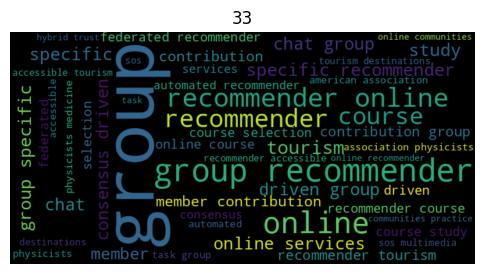

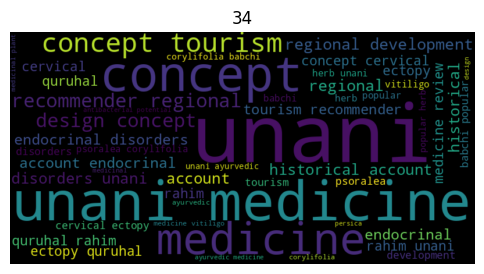

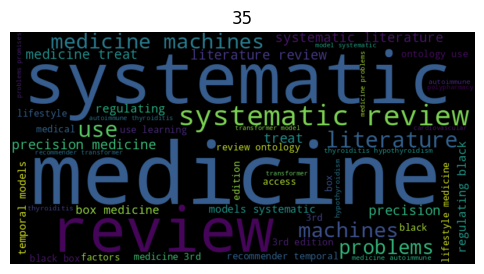

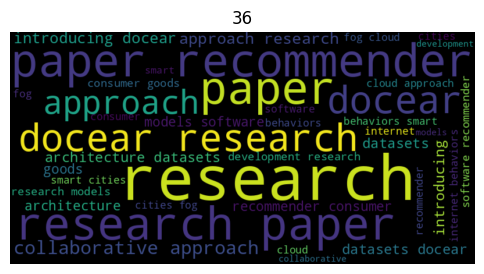

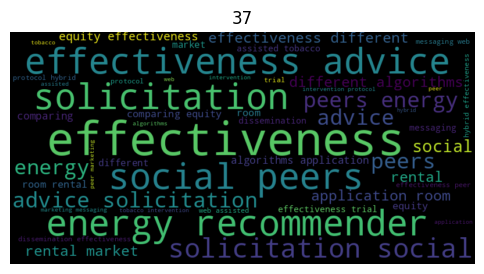

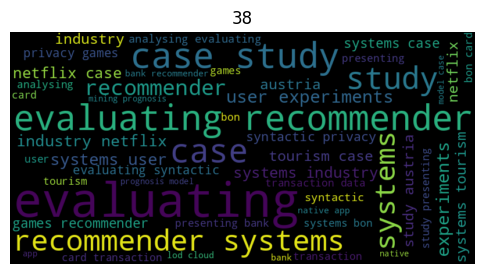

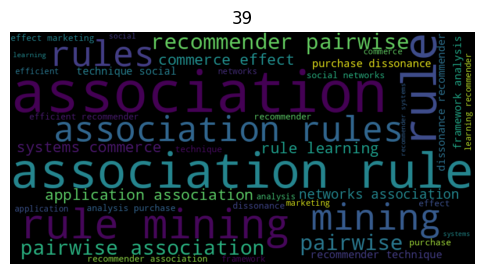

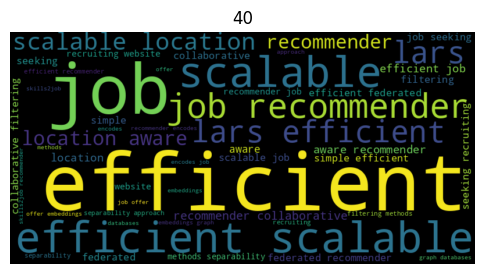

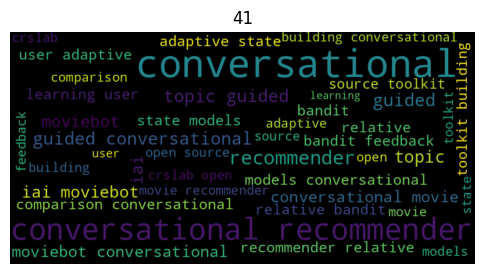

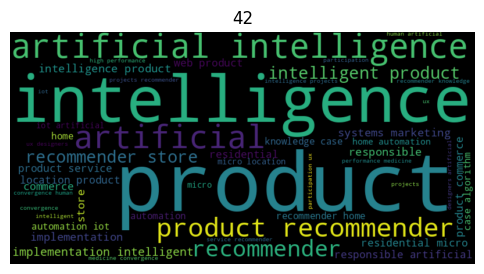

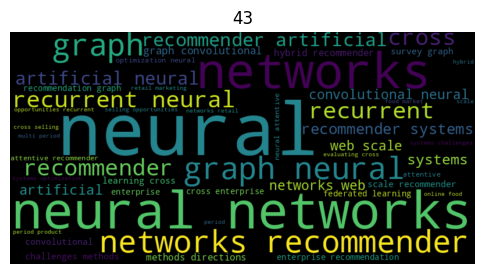

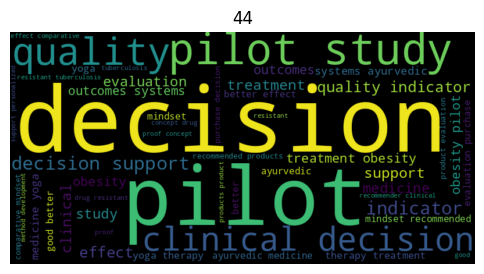

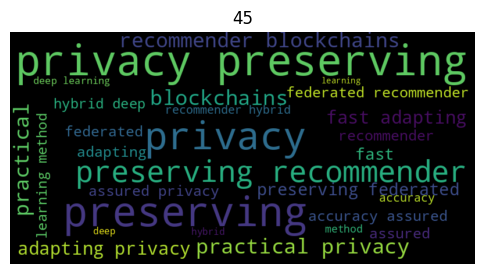

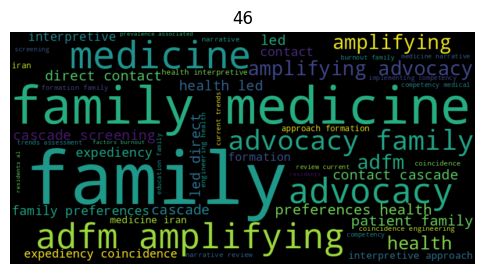

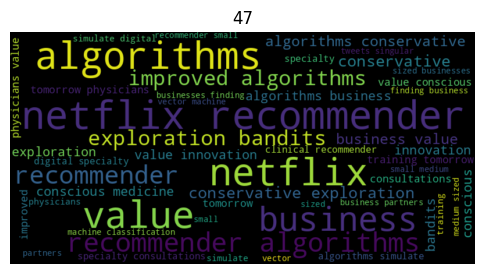

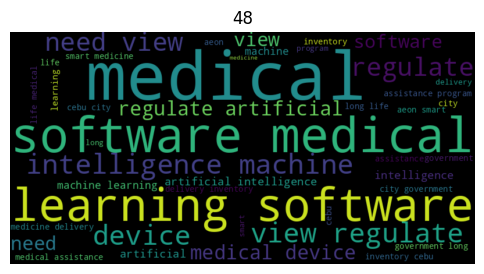

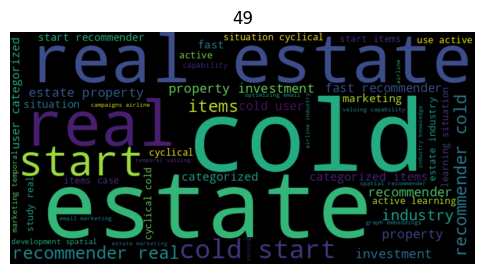

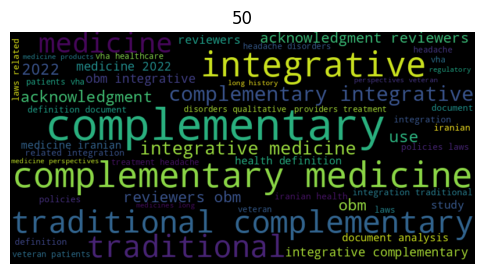

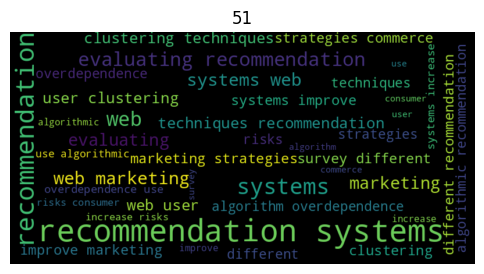

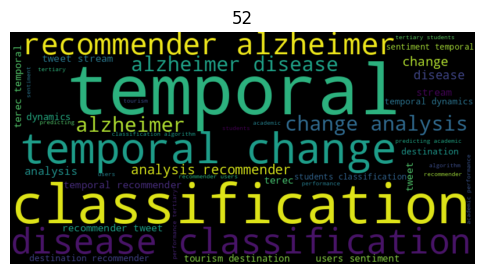

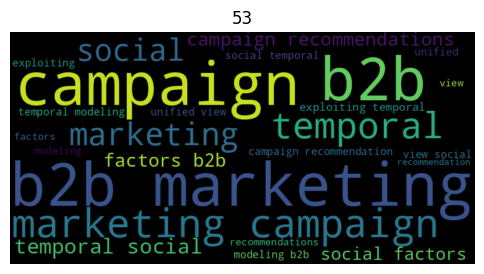

In [148]:
from wordcloud import WordCloud
'''
cluster words is a vector of dictionary those dictionaries have the frequency of word(got by using TF-IDF).
'''
cluster_words_dict = []

for cw in cluster_words:
   cluster_words_dict.append(cw.to_dict()) 


for n,word_dict  in enumerate(cluster_words_dict):
    wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(word_dict)

    import matplotlib.pyplot as plt

    plt.figure(figsize=(6, 6))
    plt.title(n)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

## Save clustered data to csv

In [149]:
merged_papers_clustered = "../recommender_systems/scraper_merged_results/scraped_merged_results_clustered.csv"
papers_df.to_csv(merged_papers_clustered)


In [152]:

paper_df = pd.read_csv(merged_papers_clustered)
paper_df[paper_df.Cluster == 12]

Unnamed: 0  Index  Article Type  \
92           92     93             1   
196         196    197             2   
345         345    346             1   
473         473    474             2   

                                                 Title  \
92   Adversarial Counterfactual Learning and Evalua...   
196  Model-Agnostic Counterfactual Reasoning for El...   
345     Counterfactual learning for recommender system   
473  Counterfactual Randomization: Rescuing Experim...   

                                               Authors  \
92   Chuanwei Ruan, Da Xu, Evren Körpeoglu, Kannan ...   
196  Chufeng Shi, Fuli Feng, Jiawei Chen, Jinfeng Y...   
345  Guohao Cai, Hong Zhu, Ji-Rong Wen, Jun Xu, Pen...   
473                           A. Forney, E. Bareinboim   

                             Publication Source  Publication Year  Citations  \
92        Neural Information Processing Systems              2020         21   
196         Knowledge Discovery and Data Mining              2020         89   
345       ACM Conference on Recommender Systems              2020         10   
473  AAAI Conference on Artificial Intelligence              2019          6   

     Importance Rate Impact Factor  \
92          2.498517                 
196         2.165184                 
345         1.998517                 
473         1.664689                 

                                          Article Link  \
92   https://www.semanticscholar.org/paper/58c4c31b...   
196  https://www.semanticscholar.org/paper/85917484...   
345  https://www.semanticscholar.org/paper/25af5cce...   
473  https://www.semanticscholar.org/paper/b56903d9...   

                                                BibTex  \
92   @['JournalArticle']{Xu2020AdversarialCL,\n aut...   
196  @['JournalArticle', 'Book', 'Conference']{Wei2...   
345  @['JournalArticle', 'Book']{Dong2020Counterfac...   
473  @['JournalArticle', 'Conference']{Forney2019Co...   

                                              Synopsis  Cluster  
92   The feedback data of recommender systems are o...       12  
196  The general aim of the recommender system is t...       12  
345  Most commercial industrial recommender systems...       12  
473  Randomized clinical trials (RCTs) like those c...       12